In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('iris.csv')

In [6]:
df.drop(['Id'],axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [19]:
df_corr = df.drop(['Species','Id'],axis=1).corr()

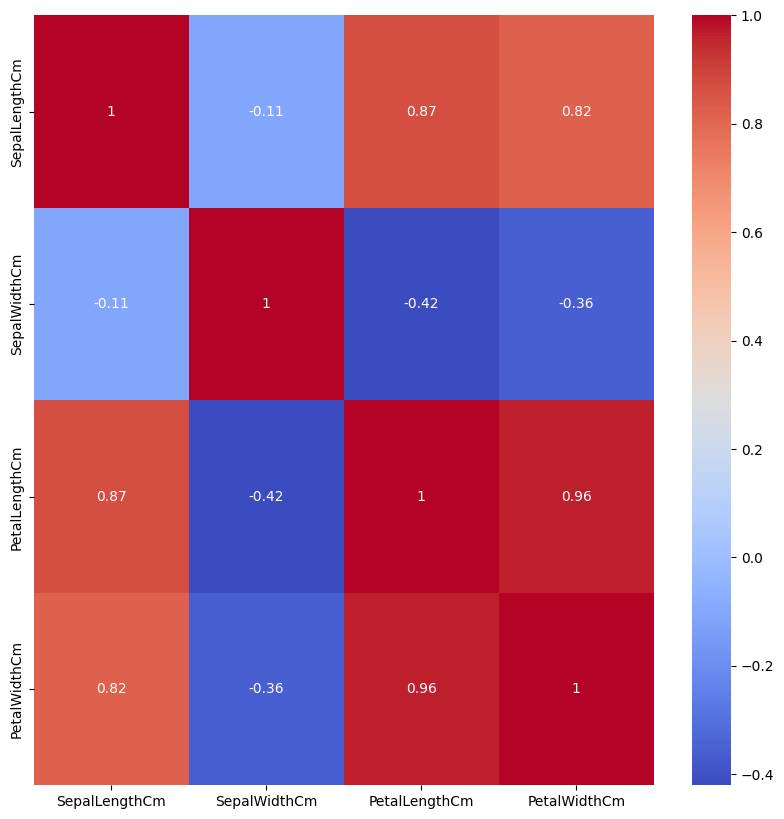

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True,cmap='coolwarm',fmt='.2g')
plt.show()

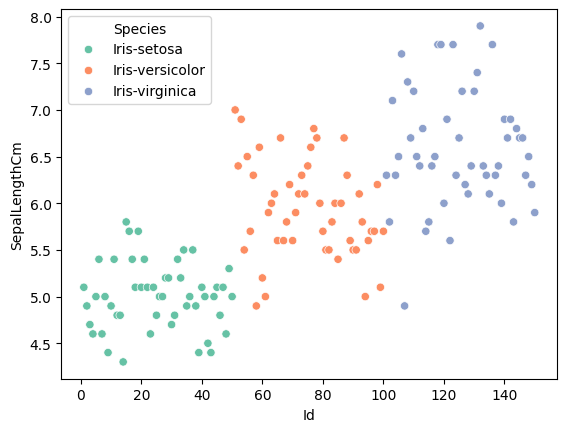

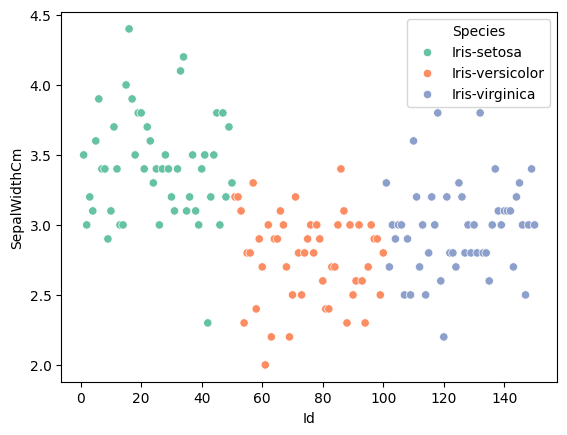

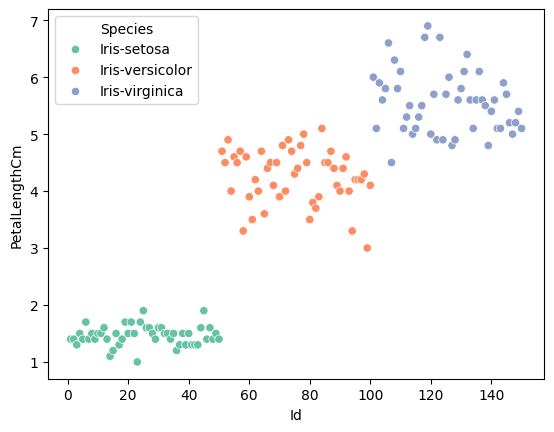

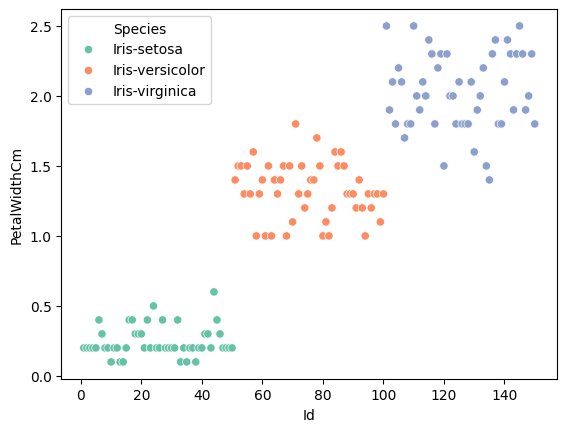

In [34]:
columns = [column for column in df.columns if df[column].dtypes != 'object' and column != 'Id']
for column in columns:
    sns.scatterplot(data=df,x='Id',y=column,hue='Species',palette='Set2')
    plt.show()

In [35]:
X = df.drop(['Id','Species'],axis=1)
y = df['Species']

In [36]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [56]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.98      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

